{% include toc title="In This Chapter" icon="file-text" %}

<div class='notice--success alert alert-info' markdown="1">

## <i class="fa fa-ship" aria-hidden="true"></i> Fundamentals of Raster Data in Python 

In this lesson, you will learn fundamental concepts related to working with raster data in **Python**, including understanding the spatial attributes of raster data, how to open raster data, and how to visually plot the data. 


## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this lesson, you will be able to:

* Open raster data using **Rioxarray** in **Python**.
* Be able to plot spatial raster data using **EarthPy** in **Python**.

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Suggested Readings 


Before starting this lesson, read the **What is a Raster** section of [this page](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/) of the Earth Lab website to familiarize yourself with the concept of raster data. 

</div>


## What is Raster data?

Raster or “gridded” data are stored as a grid of values which are rendered on a map as pixels. Each pixel value represents an area on the Earth’s surface making the data spatial. A raster file is composed of regular grid of cells, all of which are the same size. You've looked at and used rasters before if you've looked at photographs or imagery in a tool like Google Earth. However, the raster files that you will work with are different from photographs in that they are spatially referenced. Each pixel represents an area of land on the ground. That area is defined by the spatial **resolution** of the raster.

<figure>
   <a href="https://www.earthdatascience.org/images/earth-analytics/raster-data/raster-concept.png" target="_blank">
   <img src="https://www.earthdatascience.org/images/earth-analytics/raster-data/raster-concept.png" alt="Raster data concept diagram."></a>
   <figcaption>A raster is composed of a regular grid of cells. Each cell is the same
   size in the x and y direction. Source: Colin Williams, NEON.
   </figcaption>
</figure>


<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** For more information on rasters, how they work, and the types of data stored in rasters, see [this chapter](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/) on using raster data from the earth data science intermediate textbook.

</div>

## Raster Data Can Have One or More Layers 

Raster data can have one or more layers. An elevation model 
for example will often just have one layer representing the 
elevation of the earth's surface for a particular location. However, 
other data including images and time series data, may result in 
a raster file that is composed of multiple layers. Different 
file types can be used to accomodate different sizes and structures
of raster data. 


## There Are Many Different File Raster File Formats
There are many different file types that are used to store 
raster data. 

### Raster Data Stored As Single Files 

Some datasets such as landsat and NAIP are stored in single files. For landsat, often you will find each band stored as a separate .tif file. NAIP stores all bands in on .tif file. Common file types for raster data stored as a single file include:

- **.tif / .tiff**: Stands for Tagged Image File Format. One of the most common ways to store raster data. How some image satellites, such as Landsat, share their data. 
- **.asc**: Stands for ASCII Raster Files. This is a text based format that stores raster data. This format is used given it's simple to store and distribute. 

#### Hierarchical Data Formats

Hierarchical data formats can store many different types of data in one single file. These formats are optimal for larger data sets where you may want to subset or only work with parts of the data at one time. Hierarchical
data can be a bit more involved to work with but they tend to make processing more efficient. Common file types for this data storage method include: 

- **.hdf / .hdf5**: Stands for Hierarchical Data Format. One of the most common hierarchical was to store raster data. How some image satellites, such as MODIS, share their data. 
- **.nc (NetCDF)**: Stands for Network Common Data Form. A common way to store climate data. 

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** Learn more about working with GeoTiff files in <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/intro-to-the-geotiff-file-format/" target="_blank">this earth data science textbook lesson.</a>. Learn more about working with HDF4 files (the format used to store MODIS data) in <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/intro-to-hdf4/" target="_blank">this earth data science textbook chapter.</a>
</div>

## What Types of Data Are Stored In Rasters?  

Some examples of data that often are provided in a raster format include:

- Satellite imagery
- Land use over large areas
- Elevation data
- Weather data
- Bathymetry data

Next you will open and work with some raster data. To begin
setup your notebook with the required python packages.

In [1]:
# Import necessary packages
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray as rxr

# Earthpy is an earthlab package to work with spatial data
import earthpy as et
import earthpy.plot as ep

# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

## Open Raster Data in Open Source Python Using Rioxarray

You can open raster data in **Python** using `rioxarray`. The code below can 
be used to open up a raster file:  

```python
# Read the data in and call it lidar_dtm (this is the variable name)
lidar_dtm = rxr.open_rasterio(lidar_dem_path, masked=True)
```

The code does the following:

1. `rxr.open_rasterio` - rxr is the alias for rioxarray. At the top of your code you include rioxarray: `import rioxarray as rxr`. 
2. `masked=True` statement will mask all `nodata` values in your array. This means that they will not be plotted and also that they will not be included in math calculations in `Python`.  


The data that you will work with below - filename: `pre_DTM.tif` is lidar 
(Light Detection and Ranging) derived elevation data. The file format is a 
**.tif** file. The data represent a Digital Terrain Model (DTM). You can 
<a href="https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/what-is-lidar-data/lidar-chm-dem-dsm/">learn more about DTMs in this earth data science lesson on lidar data.</a> 

Below, you create a path to the file you want to open. 

In [2]:
# Create a path to file
lidar_dtm_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")
lidar_dtm_path

'colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif'

Next, open up your data.

In [3]:
# Open and read in the digital terrain model
# Note that rxr is the alias for rioxarray
lidar_dtm = rxr.open_rasterio(lidar_dtm_path, masked=True)

# View the data - notice the data structure is different from geopandas data
# which you explored in the last lesson
lidar_dtm

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float64]
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

## Explore Raster Data Values & Structure 

Next, have a look at the data. Notice that the data structure of `type()` of 
Python object returned by rioxarray is an xarray DataArray. This contains metadata about the array, as well as the data for the array stored in a numpy array. Numpy arrays are an
efficient way to store and work with raster data in python. You will learn 
more about working with numpy arrays 
<a href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/numpy-arrays/">in the numpy array chapter of the introduction to earth data 
science textbook</a>


<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:**  To view the numpy array stored inside of an xarray DataArray, you can access it by putting `.values` at the end of your Rioxarray variable's name. For example, `rioxarray_name.values` will return a numpy array with all the values stored in it. We use `.values` to plot with the earthpy `plot_rgb` function, since that needs a numpy array as an input!
</div>

In [4]:
type(lidar_dtm)

xarray.core.dataarray.DataArray

In [5]:
# View the min and max values of the array
print(lidar_dtm.min(), lidar_dtm.max())

<xarray.DataArray ()>
array(1676.20996094)
Coordinates:
    spatial_ref  int64 0 <xarray.DataArray ()>
array(2087.42993164)
Coordinates:
    spatial_ref  int64 0


In [6]:
# View the dimensions of the array (rows, columns)
lidar_dtm.shape

(1, 2000, 4000)

Finally you can plot your data. For plotting you will use `earthpy.plot_bands`.

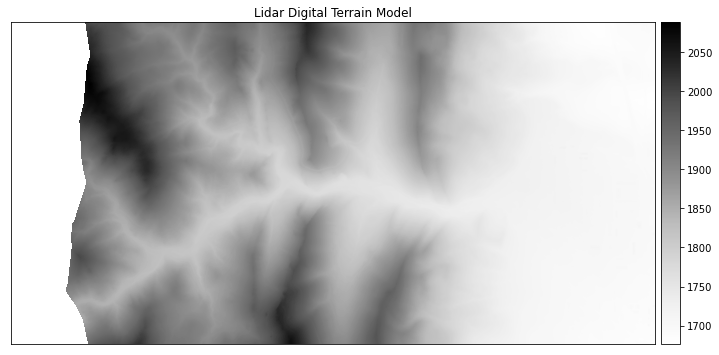

In [7]:
ep.plot_bands(lidar_dtm,
              scale=False,
              cmap='Greys',
              title="Lidar Digital Terrain Model")
plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 1:  Explore Elevation Data Values

Look closely at the plot above. What do you think the colors and numbers 
represent in the plot? 

What units do the numbers represents?
</div>

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 2:  Open & Plot a Raster Dataset

The above lidar DTM that you opened represents a dataset produced before a flood occurred in 2013 in Colorado. A path to a second lidar dataset which is for the same area but from data collected after the flood is below. 

Use the code below to create a path to the post-flood data. 
Then do the following using the code above as a guide to open and plot 
your data:

1. Use `rioxarray` to open the data as a numpy array following the code 
that you used above
2. View the min and max data values for the output numpy array
3. Create a plot of the data

```python
# Add the code here to open, show, and close the raster dataset.

lidar_dem_path_post_flood = os.path.join("data", "colorado-flood", "spatial",
                                         "boulder-leehill-rd", "post-flood", "lidar",
                                         "post_DTM.tif")
```

Hint: Don't forget to use `rxr.open_rasterio()` and assign the output to a variable! Also, don't forget to call `.values` on your rioxarray when plotting it with `plot_rgb`, that function needs a numpy array input to work!

An example of what your plot should look like is below. 
</div>


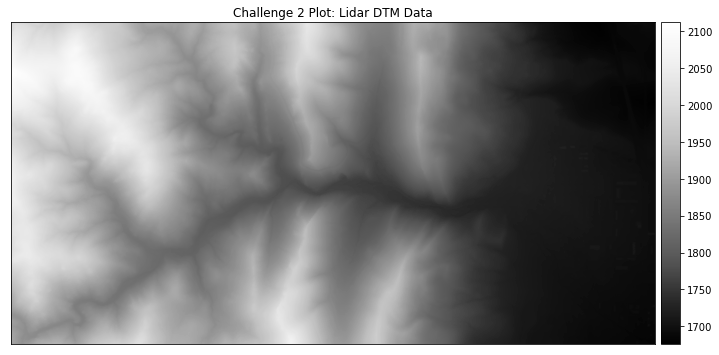

In [8]:
# Add the code to open and plot your data here

lidar_dem_path_post_flood = os.path.join("colorado-flood", 
                                         "spatial",
                                         "boulder-leehill-rd", 
                                         "post-flood", 
                                         "lidar",
                                         "post_DTM.tif")

# Open and read in the digital terrain model
# Note that rxr is the alias for rioxarray
lidar_dtm_post = rxr.open_rasterio(lidar_dem_path_post_flood, masked=True) 

# View the data - notice the structure is different from what geopandas data
# which you explored in the last lesson
ep.plot_bands(lidar_dtm_post,
             title="Challenge 2 Plot: Lidar DTM Data")
plt.show()

## Imagery - Another Type of Raster Data 

Another type of raster data that you may see is imagery. 
If you have used Google Maps or another mapping tool that has an imagery layer,
you are looking at raster data. You can open and plot imagery data using Python 
as well.

Below you download and open up some NAIP data that were collected before a fire that occured
close to Nederland, Colorado.

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:**  NAIP data is imagery collected by the United 
States Department of Agriculture every 2 years across the United 
States. Learn more about 
NAIP data in <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/intro-naip/">this chapter of the earth data science intermediate 
textbook. </a>
</div>

In [9]:
# Download NAIP data
et.data.get_data(url="https://ndownloader.figshare.com/files/23070791")

'/home/nathan/earth-analytics/data/earthpy-downloads/naip-before-after'

In [10]:
# Create a path for the data file - notice it is a .tif file
naip_pre_fire_path = os.path.join("earthpy-downloads",
                                  "naip-before-after",
                                  "pre-fire",
                                  "crop",
                                  "m_3910505_nw_13_1_20150919_crop.tif")

naip_pre_fire_path

'earthpy-downloads/naip-before-after/pre-fire/crop/m_3910505_nw_13_1_20150919_crop.tif'

In [11]:
# Open the data using rioxarray
naip_pre_fire = rxr.open_rasterio(naip_pre_fire_path)

naip_pre_fire

<xarray.DataArray (band: 4, y: 2312, x: 4377)>
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int64 1 2 3 4
  * y            (y) float64 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
  * x            (x) float64 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    _FillValue:          -32768.0
    scale_factor:        1.0
    add_offset:          0.0
    grid_mapping:        spatial_ref

Plotting imagery is a bit different because imagery is composed of multiple 
bands. While we won't get into the specifics of bands and images in this lesson, 
you can see below that an image is composed of multiple layers of information.

You can plot each band individually as you see below using `plot_bands()`. 
Or you can plot a color image,
similar to the image that your camera stores when you take a picture.

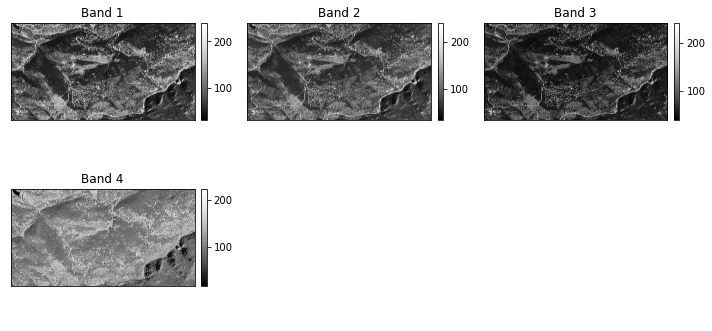

In [12]:
# Plot each layer or band of the image separately
ep.plot_bands(naip_pre_fire, figsize=(10, 5))
plt.show()

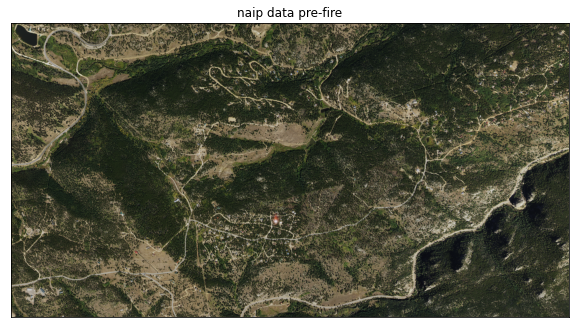

In [13]:
# Plot color image
#
ep.plot_rgb(naip_pre_fire.values,
            title="naip data pre-fire")
plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge:  Plot NAIP Imagery Post Fire 

In the code below, you see a path to a NAIP dataset that was collected 
after the fire in Colorado. Use that path to:

1. Open the post fire data
2. Plot a color version of data using `plot_rgb()`

</div>


In [14]:
# Add the code here to open the raster and read the numpy array inside it
# Create a path for the data file - notice it is a .tif file
naip_post_fire_path = os.path.join("earthpy-downloads",
                                   "naip-before-after",
                                   "post-fire",
                                   "crop",
                                   "m_3910505_nw_13_1_20170902_crop.tif")

naip_post_fire_path

'earthpy-downloads/naip-before-after/post-fire/crop/m_3910505_nw_13_1_20170902_crop.tif'

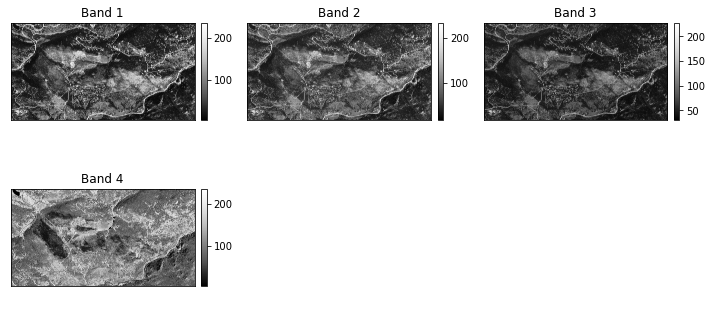

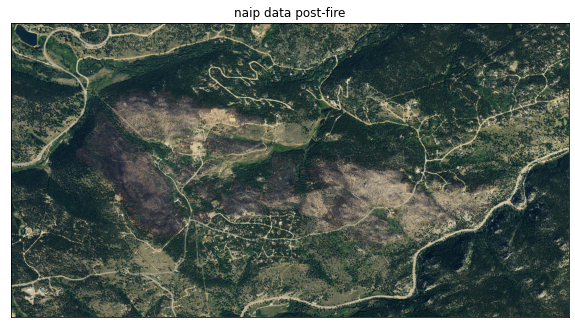

In [15]:
# Add the code needed to open and plot the NAIP post fire data here
# Open the data using rioxarray
naip_post_fire = rxr.open_rasterio(naip_post_fire_path)

# Plot each layer or band of the image separately
ep.plot_bands(naip_post_fire, figsize=(10, 5))
plt.show()

# Plot color image
ep.plot_rgb(naip_post_fire.values,
            title="naip data post-fire")
plt.show()

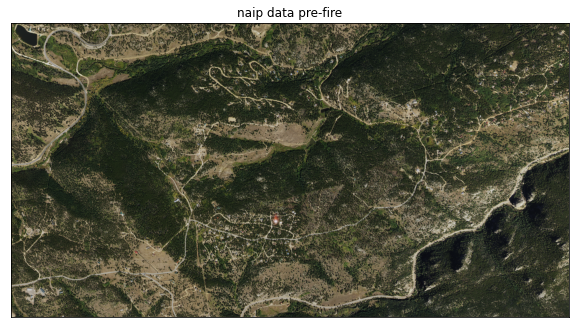

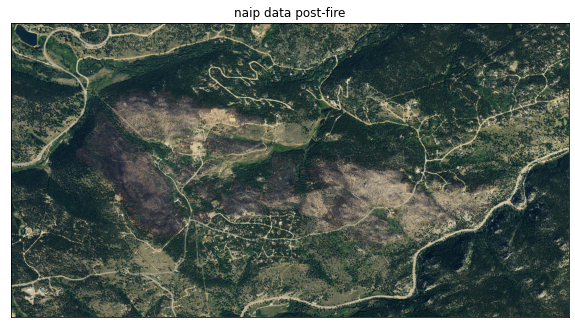

In [16]:
# Comparing pre- to post-fire.
# Plot color image
ep.plot_rgb(naip_pre_fire.values,
            title="naip data pre-fire")

ep.plot_rgb(naip_post_fire.values,
            title="naip data post-fire")
plt.show()